**[Python Course Home Page](https://www.kaggle.com/learn/python)**

---

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def compute_distances_no_loops(X, X_train):
    dists = -2 * np.dot(X, X_train.T) + np.sum(X_train**2,    axis=1) + np.sum(X**2, axis=1)[:, np.newaxis]
    return dists

Automatically created module for IPython interactive environment


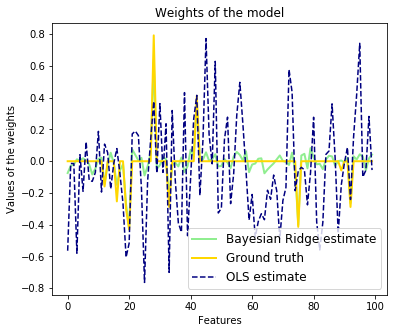

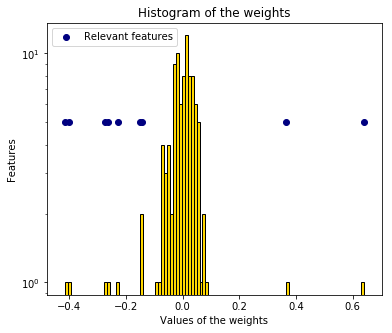

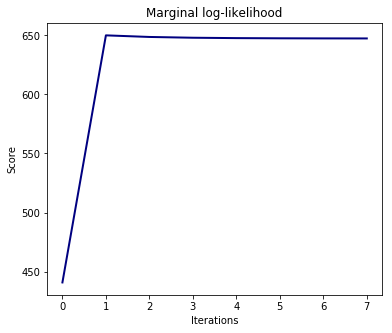

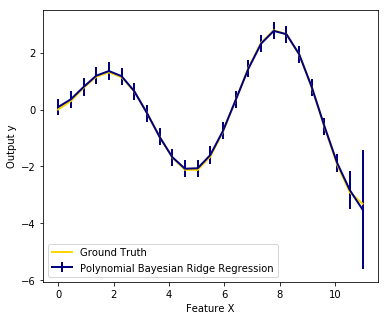

In [32]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import BayesianRidge, LinearRegression

# #############################################################################
# Generating simulated data with Gaussian weights
np.random.seed(0)
n_samples, n_features = 100, 100
X = np.random.randn(n_samples, n_features)  # Create Gaussian data
# Create weights with a precision lambda_ of 4.
lambda_ = 4.
w = np.zeros(n_features)
# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, 10)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))
# Create noise with a precision alpha of 50.
alpha_ = 50.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples)
# Create the target
y = np.dot(X, w) + noise

# #############################################################################
# Fit the Bayesian Ridge Regression and an OLS for comparison
clf = BayesianRidge(compute_score=True)
clf.fit(X, y)

ols = LinearRegression()
ols.fit(X, y)

# #############################################################################
# Plot true weights, estimated weights, histogram of the weights, and
# predictions with standard deviations
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
         label="Bayesian Ridge estimate")
plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
plt.plot(ols.coef_, color='navy', linestyle='--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, color='gold', log=True,
         edgecolor='black')
plt.scatter(clf.coef_[relevant_features], np.full(len(relevant_features), 5.),
            color='navy', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color='navy', linewidth=lw)
plt.ylabel("Score")
plt.xlabel("Iterations")


# Plotting some predictions for polynomial regression
def f(x, noise_amount):
    y = np.sqrt(x) * np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y + noise_amount * noise


degree = 10
X = np.linspace(0, 10, 100)
y = f(X, noise_amount=0.1)
clf_poly = BayesianRidge()
clf_poly.fit(np.vander(X, degree), y)

X_plot = np.linspace(0, 11, 25)
y_plot = f(X_plot, noise_amount=0)
y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std=True)
plt.figure(figsize=(6, 5))
plt.errorbar(X_plot, y_mean, y_std, color='navy',
             label="Polynomial Bayesian Ridge Regression", linewidth=lw)
plt.plot(X_plot, y_plot, color='gold', linewidth=lw,
         label="Ground Truth")
plt.ylabel("Output y")
plt.xlabel("Feature X")
plt.legend(loc="lower left")
plt.show()

start generate data!
before y.shape is  (10000,)
after y.shape is  (10000,)
generat num finished!


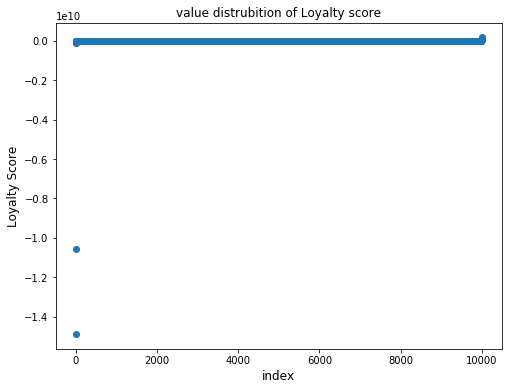

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import lightgbm as lgb

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge, LinearRegression

def convert_y(y):
    y_new_val_lst = []
    bias = 0.099
    for y_val in y:
#         print('y_val is ', y_val)
        if y_val>=0.0:
            y_new_val = np.e**(y_val)/1
        else:
            y_new_val = -np.e**(-1*y_val)/1
#         y_new += bias
        y_new_val_lst.append(y_new_val)
    y_new = np.array(y_new_val_lst).T
#     y_new = np.clip(y_new, -20, 20)
    return y_new

def convert_back_y(y):
    y_new_val_lst = []
    bias = 0.099
    for y_val in y:
        if y_val<0:
            y_new_val = -np.log(-y_val*1)
        else:
            y_new_val = np.log(y_val*1)
        y_new_val_lst.append(y_new_val)
    y_new = np.array(y_new_val_lst).T
    return y_new

# #############################################################################
# Generating simulated data with Gaussian weights
print('start generate data!')

np.random.seed(0)
n_samples, n_features, n_features_used = 10000, 300, 100
X = np.random.randn(n_samples, n_features)  # Create Gaussian data
# Create weights with a precision lambda_ of 4.

w = np.zeros(n_features)
# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, n_features_used)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(3))
# Create noise with a precision alpha of 50.

noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(80.), size=n_samples)
# Create the target
y = np.dot(X, w) + noise
print('before y.shape is ', y.shape)
y = convert_y(y)
print('after y.shape is ', y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('generat num finished!')

plt.figure(figsize=(8,6))
plt.scatter(range(len(y)), np.sort(y))
plt.title("value distrubition of Loyalty score")
plt.xlabel('index', fontsize=12)
plt.ylabel('Loyalty Score', fontsize=12)
plt.show()

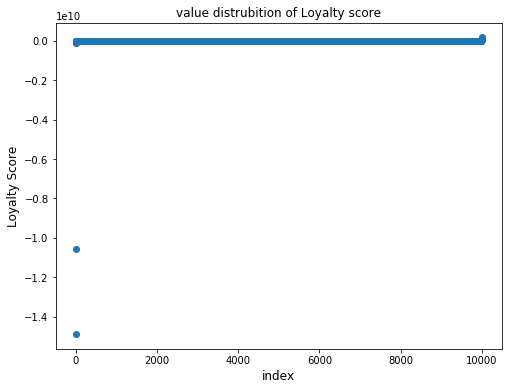

In [107]:
target_col = 'target'

plt.figure(figsize=(8,6))
plt.scatter(range(len(y)), np.sort(y))
plt.title("value distrubition of Loyalty score")
plt.xlabel('index', fontsize=12)
plt.ylabel('Loyalty Score', fontsize=12)
plt.show()

In [108]:
y_train_origial = convert_back_y(y_train)

# #############################################################################
# Fit the Bayesian Ridge Regression and an OLS for comparison
brr = BayesianRidge(compute_score=True)
brr.fit(X_train, y_train)
y_pred_brr = brr.predict(X_test)

print('brr with no convert rmse val is ', np.sqrt(mean_squared_error(y_pred_brr, y_test)))

brr = BayesianRidge(compute_score=True)
brr.fit(X_train, y_train_origial)
y_pred_brr = brr.predict(X_test)
y_pred_brr_coverted = convert_back_y(y_pred_brr)

print('brr with convert rmse val is ', np.sqrt(mean_squared_error(y_pred_brr_coverted, y_test)))

print('clf fit finished!')

ols = LinearRegression()
ols.fit(X_train, y_train)
y_pred_ols = ols.predict(X_test)
print('ols rmse val is ', np.sqrt(mean_squared_error(y_pred_ols, y_test)))

ols = LinearRegression()
ols.fit(X_train, y_train_origial)
y_pred_ols = ols.predict(X_test)
y_pred_ols_coverted = convert_back_y(y_pred_ols)
print('ols with convert rmse val is ', np.sqrt(mean_squared_error(y_pred_ols_coverted, y_test)))

print('ols fit finished!')
param_regressor = {
         'num_leaves': 101,
         'min_data_in_leaf': 30, 
         'objective':'regression',
         'max_depth': -1,
         'learning_rate': 0.007,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9 ,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.1,
         "verbosity": -1,
         'random_state': 2019
}

trn_data = lgb.Dataset(X_train, label=y_train)

# print('start regressor training...')
# lgb_model = lgb.train(param_regressor, trn_data, 500, verbose_eval=100)   
# y_pred_lgb = lgb_model.predict(X_test)
# print('lgb rmse val is ', np.sqrt(mean_squared_error(y_pred_lgb, y_test)))

# clf rmse val is  589956.9420349462
# clf fit finished!
# ols rmse val is  795307.2592917023
# ols fit finished!

4292015.400922055
2063346.6911373537
clf fit finished!
ols rmse val is  53089918.734005354
ols with convert rmse val is  2063346.6911366559


brr with no convert rmse val is  4292015.400922055
brr with convert rmse val is  2063346.6911373537
clf fit finished!
ols rmse val is  53089918.734005354
ols with convert rmse val is  2063346.6911366559
ols fit finished!


In [85]:
param_regressor = {
         'num_leaves': 31,
         'min_data_in_leaf': 30, 
         'objective':'regression',
         'max_depth': -1,
         'learning_rate': 0.007,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9 ,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.1,
         "verbosity": -1,
         'random_state': 2019
}

X_train_lgb, X_val_lgb, y_train_lgb, y_val_lgb = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

trn_data = lgb.Dataset(X_train_lgb, label=y_train_lgb)
val_data = lgb.Dataset(X_val_lgb, label=y_val_lgb)

num_round = 2000
print('start regressor training...')
lgb_model = lgb.train(param_regressor, trn_data, num_round, valid_sets = [trn_data, val_data], 
                verbose_eval=100, early_stopping_rounds = 200)
y_pred_lgb = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
print('lgb rmse val is ', np.sqrt(mean_squared_error(y_pred_lgb, y_test)))

start regressor training...
Training until validation scores don't improve for 200 rounds.
[100]	training's rmse: 1.65212e+06	valid_1's rmse: 3.52585e+06
[200]	training's rmse: 1.62586e+06	valid_1's rmse: 3.52687e+06
Early stopping, best iteration is:
[1]	training's rmse: 1.68144e+06	valid_1's rmse: 3.52472e+06
lgb rmse val is  589257.8442868937


In [52]:
noise.std()

0.09841108617204906

In [42]:
vv = stats.norm.rvs(loc=0, scale=1. /5, size=500)

In [44]:
vv.mean(), vv.std()

(0.00918757583087531, 0.19374441906898218)

In [23]:
df1 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': [100., 50., -30., -50.]})

        
df2 = pd.DataFrame({'A': 1.,
                  'B': pd.Timestamp('20130102'),
                  'C': pd.Series(1, index=list(range(4)), dtype='float32')}) 

In [29]:
def new_func(df1, df2):
    for df in (df1, df2):
        df['c_new111'] = df['C']*0.77
new_func(df1, df2)

In [30]:
df2

,A,B,C,c_new,c_new111
0,1.0,2013-01-02,1.0,0.77,0.77
1,1.0,2013-01-02,1.0,0.77,0.77
2,1.0,2013-01-02,1.0,0.77,0.77
3,1.0,2013-01-02,1.0,0.77,0.77


In [28]:
X = np.array([[1, 2, 3], [2, 3, 5]])
X_train = np.array([1, 2, 3])

print('X.shape is', X.shape, 'X_train.shape is', X_train.shape)
# results = compute_distances_no_loops(X, X_train)

print(X-X_train)

np.linalg.norm(X-X_train, axis=1, ord=2), np.sqrt(6)

result = np.linalg.norm(X-X_train, axis=1, ord=2)
print(result==result.min())

# results
# from numpy.linalg import norm
# norm(X-(X_train[:, np.newaxis]), axis=0, ord=2)

X.shape is (2, 3) X_train.shape is (3,)
[[0 0 0]
 [1 1 2]]
[ True False]


In [ ]:
lst = [(1160, 7792), (693,2375), (369,961), 
       (301,871), (311,802), (218,656), (221,521)]
fork_num_lst = list(map(lambda x: x[1], lst))
print(fork_num_lst)

# fig = plt.figure(1) 

# #figure对象的add_axes()可以在其中创建一个axes对象,
# # add_axes()的参数为一个形如[left, bottom, width, height]的列表,取值范围在0与1之间;
# ax = fig.add_axes([0.1, 0.5, 0.8, 0.5]) # 我们把它放在了figure图形的上半部分，对应参数分别为：left, bottom, width, height;
# ax.set_xlabel('time')     #用axes对象的set_xlabel函数来设置它的xlabel

# line =ax.plot(range(5))[0]  #用axes对象的plot()进行绘图,它返回一个Line2D的对象;
# line.set_color('r')             # 再调用Line2D的对象的set_color函数设置color的属性;
# plt.show()

plt.plot(fork_num_lst)
plt.show()

In [39]:
df = pd.DataFrame([('bird', 389.0),
                   ('bird', 24.0),
                   ('mammal', 80.5),
                   ('mammal', np.nan)],
                   index=['falcon', 'parrot', 'lion', 'monkey'],
                   columns=('class', 'max_speed'))

# >>> df
#          class  max_speed
# falcon    bird      389.0
# parrot    bird       24.0
# lion    mammal       80.5
# monkey  mammal        NaN
df['aaa'] = [4, 5, 6, 8]

df

,class,max_speed,aaa
falcon,bird,389.0,4
parrot,bird,24.0,5
lion,mammal,80.5,6
monkey,mammal,NaN,8


In [37]:
# df.reset_index(name='new_col')

# (df.groupby('class')
#           .size()
#           .reset_index(name='transactions_count'))

x = np.arange(6).reshape((2,3))

x = np.array([[0, -100], [30, 22], [11, 44]])

print('x is', x)
np.ptp(x, axis=1)

x is [[   0 -100]
 [  30   22]
 [  11   44]]


array([100,   8,  33])

In [19]:
from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
print(scaler.fit(data))
StandardScaler(copy=True, with_mean=True, with_std=True)
print(scaler.mean_)
print(scaler.var_)
print(scaler.transform(data))
print(scaler.transform([[2, 2]]))

StandardScaler(copy=True, with_mean=True, with_std=True)
[0.5 0.5]
[0.25 0.25]
[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
[[3. 3.]]


In [17]:
tol_lst = [0.001, 0.01, 0.1]
alpha_1_lst = [1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01]
alpha_2_lst = [1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01]
lambda_1_lst = [1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01]
lambda_2_lst = [1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01]
normalize_lst = [True, False]

import itertools
itertools.combinations(tol_lst,2)

import itertools
a = [[1,2,3],[4,5,6],[7,8,9,10]] # 3*3*4
ll = list(itertools.product(*a))
ll = list(itertools.product(tol_lst, alpha_1_lst, normalize_lst))

for tol, alpha, normalize in itertools.product(tol_lst, alpha_1_lst, normalize_lst):
    print('tol ', tol, 'alpha ', alpha, 'normalize ', normalize)
# print(ll)
print('len of ll is ', len(ll))

tol  0.001 alpha  1e-06 normalize  True
tol  0.001 alpha  1e-06 normalize  False
tol  0.001 alpha  1e-05 normalize  True
tol  0.001 alpha  1e-05 normalize  False
tol  0.001 alpha  0.0001 normalize  True
tol  0.001 alpha  0.0001 normalize  False
tol  0.001 alpha  0.001 normalize  True
tol  0.001 alpha  0.001 normalize  False
tol  0.001 alpha  0.01 normalize  True
tol  0.001 alpha  0.01 normalize  False
tol  0.001 alpha  0.1 normalize  True
tol  0.001 alpha  0.1 normalize  False
tol  0.01 alpha  1e-06 normalize  True
tol  0.01 alpha  1e-06 normalize  False
tol  0.01 alpha  1e-05 normalize  True
tol  0.01 alpha  1e-05 normalize  False
tol  0.01 alpha  0.0001 normalize  True
tol  0.01 alpha  0.0001 normalize  False
tol  0.01 alpha  0.001 normalize  True
tol  0.01 alpha  0.001 normalize  False
tol  0.01 alpha  0.01 normalize  True
tol  0.01 alpha  0.01 normalize  False
tol  0.01 alpha  0.1 normalize  True
tol  0.01 alpha  0.1 normalize  False
tol  0.1 alpha  1e-06 normalize  True
tol  0.1 a

In [138]:
import sklearn 
print (sklearn.__version__)

0.19.1


In [ ]:
# 测试 bayes ridge regression回归
from sklearn.linear_model import BayesianRidge, LinearRegression

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE_TSG)
# folds = KFold(n_splits=5, shuffle=True, random_state=15)

oof_regressor_brr = np.zeros(len(df_train))
brr_predictions = np.zeros(len(df_test))

def norm_df(df):
    print('in norm_df')
    df_norm = (df - df.mean()) / (df.max() - df.min())
    return df_norm

def fill_with_mean(df, feas):
    print('in fill_with_mean')
    for fea in feas:
        df[fea].fillna(df[fea].mean(), inplace=True)
    return df
    
start = time.time()
# brr = BayesianRidge(n_iter=1000, verbose=True) 
brr = BayesianRidge(n_iter=1000, tol=1e-6, alpha_1=1e-05, alpha_2=1e-05, verbose=True) 

df_train_brr = df_train.copy()
df_test_brr = df_test.copy()

# df_train_brr = df_train_brr.fillna(0.0)
# df_test_brr = df_test_brr.fillna(0.0)

print('start fill with mean')

df_train_brr = fill_with_mean(df_train_brr, features)
df_test_brr = fill_with_mean(df_test_brr, features)

print('start norm')

df_train_brr[features] = norm_df(df_train_brr[features])
df_test_brr[features] = norm_df(df_test_brr[features])

print('ending norm')

print('start bayes ridge regression training')
for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train.values, df_train['outliers'].values)):
    print("fold n°{}".format(fold_))
    brr.fit(df_train_brr.iloc[trn_idx][features], df_train_brr['target'].iloc[trn_idx])
    oof_regressor_brr[val_idx] = brr.predict(df_train_brr.iloc[val_idx][features])
    brr_predictions += brr.predict(df_test_brr[features].values) / 5.
    print('final rmse val is ', np.sqrt(mean_squared_error(df_train_brr.iloc[val_idx]['target'].values, 
                                                           oof_regressor_brr[val_idx])))
    
print('final brr rmse val is ', np.sqrt(mean_squared_error(df_train_brr['target'].values, oof_regressor_brr)))

# start norm
# ending norm
# start bayes ridge regression training
# fold n°0
# final rmse val is  3.806076950362962
# fold n°1
# final rmse val is  3.779403705505596
# fold n°2
# final rmse val is  150.34690570346518
# fold n°3
# final rmse val is  3.7754369642818877
# fold n°4
# final rmse val is  4.4753798374860585
# final brr rmse val is  67.33055964373135

#################################################
# fill with 0 normal
# fold n°0
# final rmse val is  3.773954411258298
# fold n°1
# final rmse val is  3.759998900810395
# fold n°2
# final rmse val is  3.7582380865818834
# fold n°3
# final rmse val is  3.7558625132092125
# fold n°4
# final rmse val is  3.7688611690916343
# final brr rmse val is  3.7633893292642013

################################################
# fill with mean normal

# start bayes ridge regression training
# fold n°0
# final rmse val is  3.7732907463257748
# fold n°1
# final rmse val is  3.758590156304969
# fold n°2
# final rmse val is  3.7565954722634456
# fold n°3
# final rmse val is  3.7551300147222824
# fold n°4
# final rmse val is  3.767392908342587
# final brr rmse val is  3.7622063927908376

In [125]:
X_test.fillna(X_test.mean())

X_test = np.array([[1, 2, np.nan], [2, np.nan, 3], [4, 5, 7], [np.nan, 3, 3]])
X_test

AttributeError: 'numpy.ndarray' object has no attribute 'fillna'

In [19]:
df = pd.DataFrame([[0, 2, 3], [0, 4, 1], [10, 20, 30]],
                  columns=['A', 'B', 'C'])

df
df.iat[2, 2] = 'abc'
print(df)
print(type(df.iat[2, 2]), df.dtypes)

ValueError: invalid literal for int() with base 10: 'abc'

In [110]:
def is_prime_num(num):
    import math
    for i in range(2, int(math.sqrt(num))):
        if num%i==0:
            print('i is ', i)
            return False
    return True

for num in range(100000, 200000, 1):
    if is_prime_num(num):
        print('num is ', num)
        break
        
# is_prime_num(10007)
print(is_prime_num(2333))
print(is_prime_num(2652124))

i is  2
i is  11
i is  2
num is  100003
True
i is  2
False


In [116]:
from sklearn.model_selection import RepeatedKFold, KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [3, 9]])
y = np.array([0, 0, 1, 1, 0])
rkf = RepeatedKFold(n_splits=3, n_repeats=2, random_state=2652124)
kf = KFold(n_splits=3, random_state=2652124)
# for train_index, test_index in rkf.split(X):
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3 4] TEST: [0 1]
TRAIN: [0 1 4] TEST: [2 3]
TRAIN: [0 1 2 3] TEST: [4]


In [124]:
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [77, 99], [88, 22], [11, 88]])
y = np.array([0, 1, 1, 0, 0, 1, 0])
rskf = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=36851234)
for train_index, test_index in rskf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

print('#####################')

skf = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

print('#####################')
    
skf = StratifiedKFold(n_splits=3, random_state=21)
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

print('#####################')
    
skf = StratifiedKFold(n_splits=3, random_state=2019)
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 4 6] TEST: [0 1 3 5]
TRAIN: [0 1 3 5] TEST: [2 4 6]
TRAIN: [0 2 4] TEST: [1 3 5 6]
TRAIN: [1 3 5 6] TEST: [0 2 4]
#####################
TRAIN: [2 4 5 6] TEST: [0 1 3]
TRAIN: [0 1 3 5 6] TEST: [2 4]
TRAIN: [0 1 2 3 4] TEST: [5 6]
#####################
TRAIN: [2 4 5 6] TEST: [0 1 3]
TRAIN: [0 1 3 5 6] TEST: [2 4]
TRAIN: [0 1 2 3 4] TEST: [5 6]
#####################
TRAIN: [2 4 5 6] TEST: [0 1 3]
TRAIN: [0 1 3 5 6] TEST: [2 4]
TRAIN: [0 1 2 3 4] TEST: [5 6]


## Comparison Operations


| Operation     | Description                       || Operation     | Description                          |
|---------------|-----------------------------------||---------------|--------------------------------------|
| ``a == b``    | ``a`` equal to ``b``              || ``a != b``    | ``a`` not equal to ``b``             |
| ``a < b``     | ``a`` less than ``b``             || ``a > b``     | ``a`` greater than ``b``             |
| ``a <= b``    | ``a`` less than or equal to ``b`` || ``a >= b``    | ``a`` greater than or equal to ``b`` |

What a silly question. Of course it's an error. 

But what about...

(Click the "output" button to see the answer)

Python has precedence rules that determine the order in which operations get evaluated in expressions like above. For example, `and` has a higher precedence than `or`, which is why the first expression above is `True`. If we had evaluated it from left to right, we would have calculated `True or True` first (which is `True`), and then taken the `and` of that result with `False`, giving a final value of `False`.

You could try to [memorize the order of precedence](https://docs.python.org/3/reference/expressions.html#operator-precedence), but a safer bet is to just use liberal parentheses. Not only does this help prevent bugs, it makes your intentions clearer to anyone who reads your code. 

For example, consider the following expression:

```python
prepared_for_weather = have_umbrella or rain_level < 5 and have_hood or not rain_level > 0 and is_workday
```

I'm trying to say that I'm safe from today's weather....
- if I have an umbrella...
- or if the rain isn't too heavy and I have a hood...
- otherwise, I'm still fine unless it's raining *and* it's a workday

But not only is my Python code hard to read, it has a bug. We can address both problems by adding some parentheses:

```python
for i in range(100):
    sum += i
    print(sum)
prepared_for_weather = have_umbrella or (rain_level < 5 and have_hood) or not (rain_level > 0 and is_workday)
```

You can add even more parentheses if you think it helps readability:

```python
prepared_for_weather = have_umbrella or ((rain_level < 5) and have_hood) or (not (rain_level > 0 and is_workday))
```

We can also split it over multiple lines to emphasize the 3-part structure described above:

```python
prepared_for_weather = (
    have_umbrella 
    or ((rain_level < 5) and have_hood) 
    or (not (rain_level > 0 and is_workday))
)
```